<a href="https://colab.research.google.com/github/leandroleao2k/PyLeao/blob/main/Flor_de_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema da classes de Flor de Iris

https://scipy-lectures.org/packages/scikit-learn/index.html#introduction-problem-settings

In [2]:
from sklearn.datasets import load_iris
iris_data = load_iris()

samples, features = iris_data.data.shape
print(iris_data.data.shape)
print("Features: ", iris_data.feature_names)
for i in iris_data.feature_names:  print(i);
# target dataset 
target_data = iris_data.target
print(type(target_data))
print("Classes " , iris_data.target_names)

(150, 4)
Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)
<class 'numpy.ndarray'>
Classes  ['setosa' 'versicolor' 'virginica']


## gerando scatter

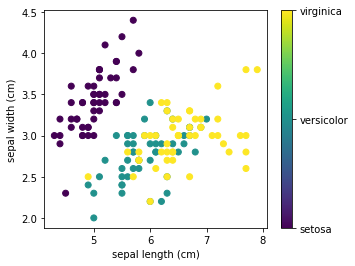

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter(iris_data.data[:,0], iris_data.data[:,1], c=target_data)
ax.set_xlabel(iris_data.feature_names[0])
ax.set_ylabel(iris_data.feature_names[1])

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris_data.target_names[int(i)])
plt.colorbar(ticks=[0, 1, 2], format=formatter)

## Regressao Linear 
O modelo vai ajudar a estimar com R.L.

In [4]:
from sklearn.linear_model import LinearRegression
#from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import make_pipeline
import numpy as np

#pipeline = make_pipeline(StandardScaler(with_mean=True), LinearRegression())
#model = LinearRegression(normalize=True, copy_X=False)
model = LinearRegression( copy_X=False)

x = np.array([0,1,2,3])
y = np.array([0,1,2,3])

X = x[:, np.newaxis] # transforma linha em coluna
print(X)
print(model)
# Fitting Data
model.fit(X,y)
#Quando os dados são fitted com um estimador, os parâmetros são estimados a partir dos dados em questão. 
#Todos os parâmetros estimados são atributos do objeto estimador terminando por um sublinhado
print(model.coef_)
model.predict([[2]])

[[0]
 [1]
 [2]
 [3]]
LinearRegression(copy_X=False)
[1.]


array([2.])

##  Supervised Learning: Classification and regression
A tarefa aqui é construir um estimador capaz de prever a classe de flor dado um conjunto de features

In [5]:
from sklearn import neighbors, datasets
X, y = iris_data.data, iris_data.target
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
print(iris_data.target_names[knn.predict([[3, 5, 4, 2]])])

['virginica']


(4.2, 8.0, 1.9, 4.5)

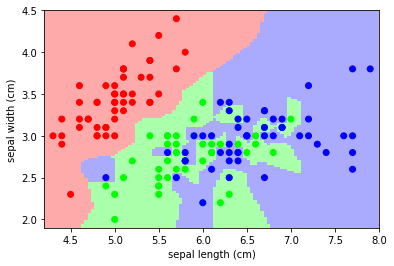

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                    # avoid this ugly slicing by using a two-dim dataset
y = iris.target

knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

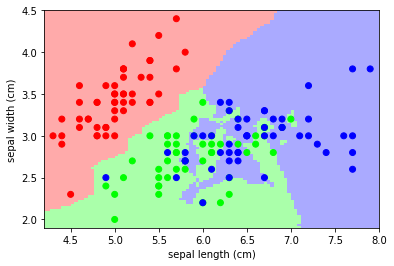

In [7]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

plt.show()